## GRIP @ THE SPARKS FOUNDATION

## Name- Dipranjan Parida

## Batch- JUNE 2022

## TASK-1 Predection using Supervised ML

## (LEVEL-BEGINNER)

Predict the percentage of an student based on the no. of study hours.
What will be predicted score if a student studies for 9.25 hrs/day.
Use R, Python, SAS Enterprise Miner or any other tool.

Here the aim is to predict the marks/number obtained by a student on the basis of the number of hours he/she studies.

In [ ]:
# Importing Librabies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#  To Avoid any warnings in the code
import warnings
warnings.filterwarnings('ignore')

#Reading Data
data = pd.read_csv(r'C:\Users\HAPPY\Desktop\Sparks Foundation\Student score\student_scores.csv',header=0)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
print(data.dtypes)
print(data.shape)
data.describe()

Hours     float64
Scores      int64
dtype: object
(25, 2)


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


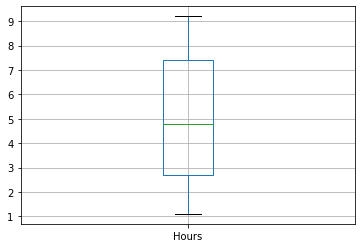

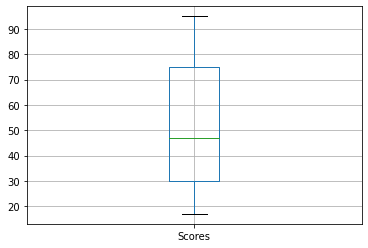

In [4]:
#Outlier treatment
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

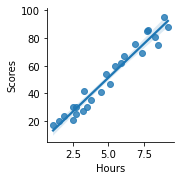

In [5]:
#Linearity with independent var
sns.pairplot(data,x_vars='Hours',y_vars='Scores',kind='reg')
plt.show()

In [6]:
#Check for the Approx Normal distribution of the dependent variable
X=data['Hours'] 
Y=data['Scores']

<AxesSubplot:xlabel='Scores', ylabel='Density'>

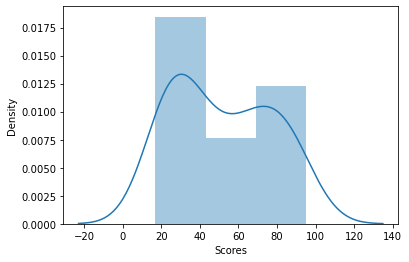

In [7]:
sns.distplot(Y)

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <BarContainer object of 10 artists>)

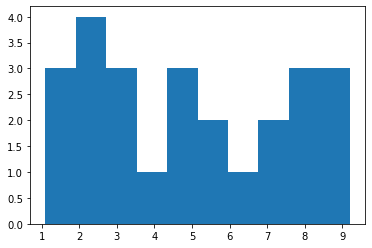

In [8]:
#Check for the skewness in the independent Variable
plt.hist(X)

<AxesSubplot:>

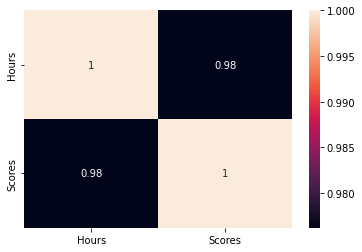

In [9]:
#There should be no multicolinearity between independent variables
correlation=data.corr()
sns.heatmap(correlation, annot=True)

In [10]:
#Regression Model

x=data.iloc[:,:1]
y=data.iloc[:,1:]

x.head()


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [13]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [14]:
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [15]:
# Splitting the Training & Testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [16]:
print("Testing Set")
print(x_test.shape)
print(y_test.shape)

Testing Set
(8, 1)
(8, 1)


In [17]:
print("Training set")
print(x_train.shape)
print(y_train.shape)

Training set
(17, 1)
(17, 1)


In [18]:
#Training the model

regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [19]:
regressor.coef_

array([[9.78856669]])

In [20]:
regressor.intercept_

array([2.37081538])

In [21]:
#Predicting the Model

y_pred = regressor.predict(x_test)

In [22]:
y_pred=pd.DataFrame(y_pred, columns=["Predicted Values"])

y_pred.head()

,Predicted Values
0,17.053665
1,33.694229
2,74.806209
3,26.842232
4,60.123359


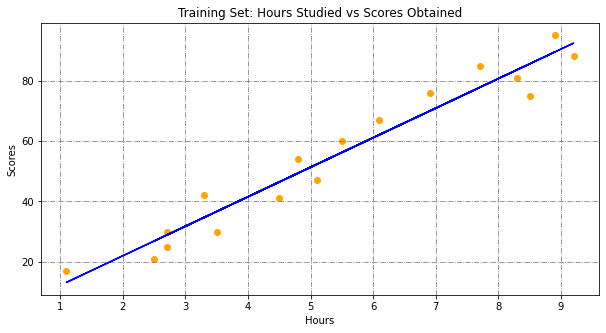

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(x_train, y_train, color='orange')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Training Set: Hours Studied vs Scores Obtained')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True, color='gray', linestyle='-.')
plt.show()

In [24]:
# Checking the accuracy scores for training and test set

print('Test Score')
print(regressor.score(x_test, y_test))
print('Training Score')
print(regressor.score(x_train, y_train))

Test Score
0.9568211104435257
Training Score
0.9484997422695115


In [25]:
#Making Predictions

#predicting how much does he/she will score if he/she will study for 9.25hrs in a day

hours=9.25
pred = regressor.predict([[hours]])
print('Number of hours = {}' .format(hours))
print('Predicted Score = {}' .format(pred[0]))

Number of hours = 9.25
Predicted Score = [92.91505723]


In [28]:
#Evaluating the model

print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Root Mean Square Error:  4.792191274636315


In [ ]:
# Here we can conclude that the predicted score for the student if he/she studies for 9.25 hrs in a day is 92.91

# Thank You